<a href="https://colab.research.google.com/github/debg48/stroke-prediction/blob/main/stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Dataset

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset'

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: debg48
Your Kaggle Key: ··········


100%|██████████| 67.4k/67.4k [00:00<00:00, 19.7MB/s]

In [ ]:
data_dir = './stroke-prediction-dataset'

In [ ]:
import os
os.listdir(data_dir)

['healthcare-dataset-stroke-data.csv']

# Data Preparation and Cleaning

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
stroke_df = pd.read_csv(data_dir + '/healthcare-dataset-stroke-data.csv')

In [ ]:
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
stroke_df.shape

(5110, 12)

In [ ]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer=SimpleImputer(strategy='mean')
imputer.fit(stroke_df[["bmi"]])


SimpleImputer()

In [ ]:
df=stroke_df.copy()

In [ ]:
df[["bmi"]]=imputer.transform(stroke_df[["bmi"]])

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['gender']=le.fit_transform(df['gender'])


In [ ]:
df['ever_married']=le.fit_transform(df['ever_married'])

In [ ]:
df['Residence_type']=le.fit_transform(df['Residence_type'])
df['work_type']=le.fit_transform(df['work_type'])
df['smoking_status']=le.fit_transform(df['smoking_status'])

In [ ]:
df.corr()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.002511,0.003538,0.003550,-0.001296,0.013690,-0.015757,-0.001403,0.001092,0.002999,0.014074,0.006388
gender,0.002511,1.000000,-0.028202,0.020994,0.085447,-0.031005,0.056422,-0.006738,0.055180,-0.026109,-0.062581,0.008929
age,0.003538,-0.028202,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.325942,0.265199,0.245257
hypertension,0.003550,0.020994,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.160189,0.111038,0.127904
heart_disease,-0.001296,0.085447,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.038899,0.048460,0.134914
ever_married,0.013690,-0.031005,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.335705,0.259647,0.108340
work_type,-0.015757,0.056422,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.299448,-0.305927,-0.032316
Residence_type,-0.001403,-0.006738,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000120,0.008237,0.015458
avg_glucose_level,0.001092,0.055180,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.168751,0.063437,0.131945
bmi,0.002999,-0.026109,0.325942,0.160189,0.038899,0.335705,-0.299448,-0.000120,0.168751,1.000000,0.219148,0.038947


In [ ]:
target=df[["stroke"]]
inputs=df.drop(["stroke"],axis=1)

In [ ]:
target

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [ ]:
inputs.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

# Model and Results

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

model = Sequential([
    Dense(units=16, input_shape=(11,), activation='relu'),
    Dense(units=8, activation='relu'),
    Dense(units=8, activation='relu'),
    Dense(units=6, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    x=inputs, 
    y=target, 
    batch_size=10, 
    epochs=20, 
    validation_split=0.2,
    shuffle=True,
    verbose=2
)

Epoch 1/20
409/409 - 1s - loss: 0.0000e+00 - accuracy: 0.9391 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 1s/epoch - 3ms/step
Epoch 2/20
409/409 - 1s - loss: 0.0000e+00 - accuracy: 0.9391 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 630ms/epoch - 2ms/step
Epoch 3/20
409/409 - 1s - loss: 0.0000e+00 - accuracy: 0.9391 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 665ms/epoch - 2ms/step
Epoch 4/20
409/409 - 1s - loss: 0.0000e+00 - accuracy: 0.9391 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 595ms/epoch - 1ms/step
Epoch 5/20
409/409 - 1s - loss: 0.0000e+00 - accuracy: 0.9391 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 606ms/epoch - 1ms/step
Epoch 6/20
409/409 - 1s - loss: 0.0000e+00 - accuracy: 0.9391 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 611ms/epoch - 1ms/step
Epoch 7/20
409/409 - 1s - loss: 0.0000e+00 - accuracy: 0.9391 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 597ms/epoch - 1ms/step
Epoch 8/20
409/409 - 1s - loss: 0.0000e+00 - accuracy: 0.9391 - val_loss

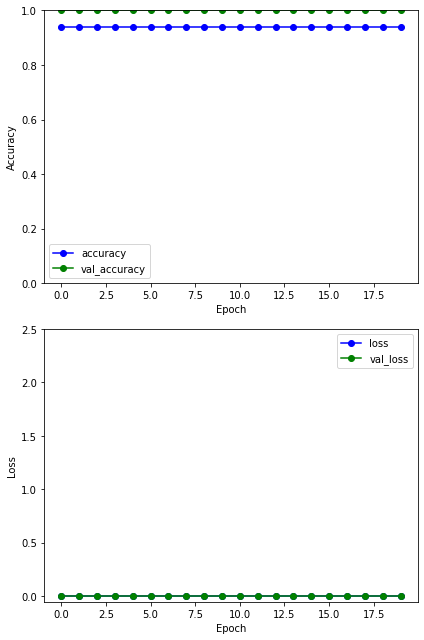

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 9))

ax1.plot(history.history["accuracy"], "-ob", label="accuracy")
ax1.plot(history.history["val_accuracy"], "-og", label="val_accuracy")
ax1.set_ylabel("Accuracy")
ax1.set_ylim([0, 1])
ax1.set_xlabel("Epoch")
ax1.legend()

ax2.plot(history.history["loss"], "-ob", label="loss")
ax2.plot(history.history["val_loss"], "-og", label="val_loss")
ax2.set_ylabel("Loss")
ax2.set_ylim(top=2.5)
ax2.set_xlabel("Epoch")
ax2.legend()
plt.tight_layout()
plt.show()